# We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. 

Task: 

1. fitting it to the periodic function 
2. plot the fit 

Data 

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

In [34]:

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

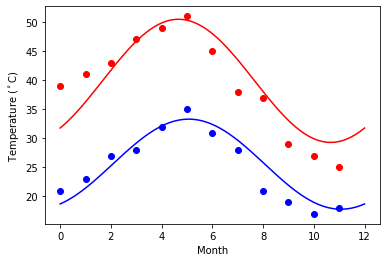

In [37]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Matplotlib:

This assignment is for visualization using matplotlib:
data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df = pd.read_csv(r"D:\Machine Learning Sentex\datasets\titanic_original.csv")

In [43]:
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [44]:
df['sex'].isnull().sum()

1

In [45]:
df['sex'].fillna(method = 'ffill', inplace = True)

In [46]:
df['sex'].isnull().sum()

0

In [47]:
df['sex'].value_counts()

male      844
female    466
Name: sex, dtype: int64

In [48]:
male_count = df['sex'].value_counts()['male']
female_count = df['sex'].value_counts()['female']

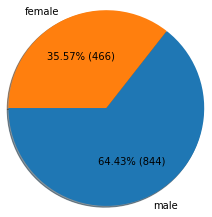

In [49]:
fig = plt.figure(figsize = (3,3))

autopct = lambda x : '{:.2f}% ({:,.0f})'.format(x, x * sum([male_count,female_count]) / 100)

plt.pie( [male_count,female_count],labels = ['male','female'],
        radius = 1.5,startangle = 180,autopct= autopct,
        shadow = True)
plt.show()

# Scatter Plot

In [50]:
df.head(2)



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [51]:
df['fare'].isnull().sum()

2

In [52]:
df['fare'].fillna(df['fare'].mean(), inplace = True)

In [53]:
df['age'].isnull().sum()


264

In [54]:
df['age'].fillna(df['age'].mean(), inplace = True)

In [55]:
df['fare'].isnull().sum()

0

In [56]:
df['age'].isnull().sum()

0

In [57]:
age_list = df['age'].tolist()
fare_list = df['fare'].tolist()
sex_count = df['sex'].tolist()

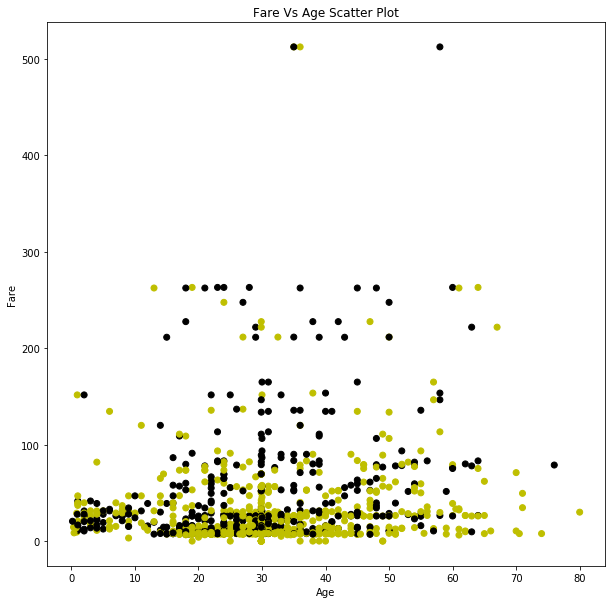

In [58]:
fig = plt.figure(figsize = (10,10))

colours = np.where(df['sex'] == 'male','y','k')

plt.scatter(age_list,fare_list, c = colours)
plt.ylabel('Fare')
plt.title('Fare Vs Age Scatter Plot')
plt.xlabel('Age')

plt.show()